In [2]:
# import packages
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
import pandas_profiling
%matplotlib inline


In [3]:
# Read in Data Frame and inspect it
df = pd.read_csv('CSV_MASTERS/population.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0


In [5]:
# Make a coordinates column that has a value of a list of longitude and latitude
df['coordinates'] = df[['reclong', 'reclat']].values.tolist()
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,"[10.23333, 56.18333000000001]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,"[-113.0, 54.21666999999999]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,"[-99.9, 16.883329999999994]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,"[-64.95, -33.16667]"


In [7]:
# Make the coordinate column a Point object
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,POINT (-99.90000000000001 16.88332999999999)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,POINT (-64.95 -33.16667)


In [11]:
df.sort_values(by=['year'], axis = 0, inplace = True)
df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
674,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)",Chondrite,L,Japan,JP,337.0,130.0,POINT (130.75 33.725)
268,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)",Iron,Iron,Czechia,CZ,0.0,0.0,POINT (12.73333 50.18333)
817,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (9.51667 45.48333)
273,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",Chondrite,LL,France,FR,118.0,45.0,POINT (7.35 47.86667)
6224,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",Iron,IAB,Argentina,AR,16.0,6.0,POINT (-60.58333 -27.46667)
167,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.8, 16.2)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (16.2 39.8)
20863,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,1600.0,27.05000,-105.43333,"(27.05, -105.43333)",Iron,IIIAB,Mexico,MX,64.0,25.0,POINT (-105.43333 27.05)
393,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.0, 75.0)",Iron,Iron,India,IN,411.0,159.0,POINT (75 31)
919,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,1623.0,50.38333,-3.95000,"(50.38333, -3.95)",Stony-Iron,Stone,United Kingdom,GB,276.0,107.0,POINT (-3.95 50.38333)
354,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,1628.0,51.65000,-1.51667,"(51.65, -1.51667)",Stony-Iron,Stone,United Kingdom,GB,276.0,107.0,POINT (-1.51667 51.65)


In [18]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0
    
df.year = df.year.apply(to_int)
df.year.astype("int64", inplace=True)
type(df.year[0])

numpy.int64

In [13]:
# Export this data frame to the CSV
df.to_csv('CSV_MASTERS/Final.csv', index = False)

In [19]:
# Making a geopandas dataframe
geo_final = gpd.GeoDataFrame(df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_final))
geo_final.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
674,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725, 130.75)",Chondrite,L,Japan,JP,337.0,130.0,POINT (130.75 33.725)
268,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)",Iron,Iron,Czechia,CZ,0.0,0.0,POINT (12.73333 50.18333)
817,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (9.51667 45.48333)
273,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)",Chondrite,LL,France,FR,118.0,45.0,POINT (7.35 47.86667)
6224,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)",Iron,IAB,Argentina,AR,16.0,6.0,POINT (-60.58333 -27.46667)


### Plotting and Functions for Plotting

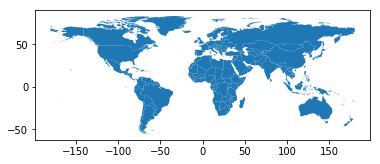

In [4]:
earth = gpd.read_file("custom.geo.json")
earth.plot()

In [47]:
# Plotting to see one meteor landing location:
# make earth the base figure
# fig, ax = plt.subplots(1, figsize=(30,20))
# base = earth.plot(ax=ax, color='#0B2380',)




In [62]:
# Function to plot one year
# geo_ISS.plot(ax=base, marker="*", markersize=10, color='#FF4179');
# fig.savefig('ISS path')

def plot_year(df, year_list, column_name_year = 'year', base_axis = base):
    """Given a base figure will plot one years worth of locations
    
        Keyword arguments:
        base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
        df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
        year -- enter a year as int
        column_name_year -- enter the column name of the year column
    
    """
    df_year = df[df[column_name_year] == year]
    df_year.plot(ax=base_axis, marker=".", markersize=5,  color='#FF4179')
    

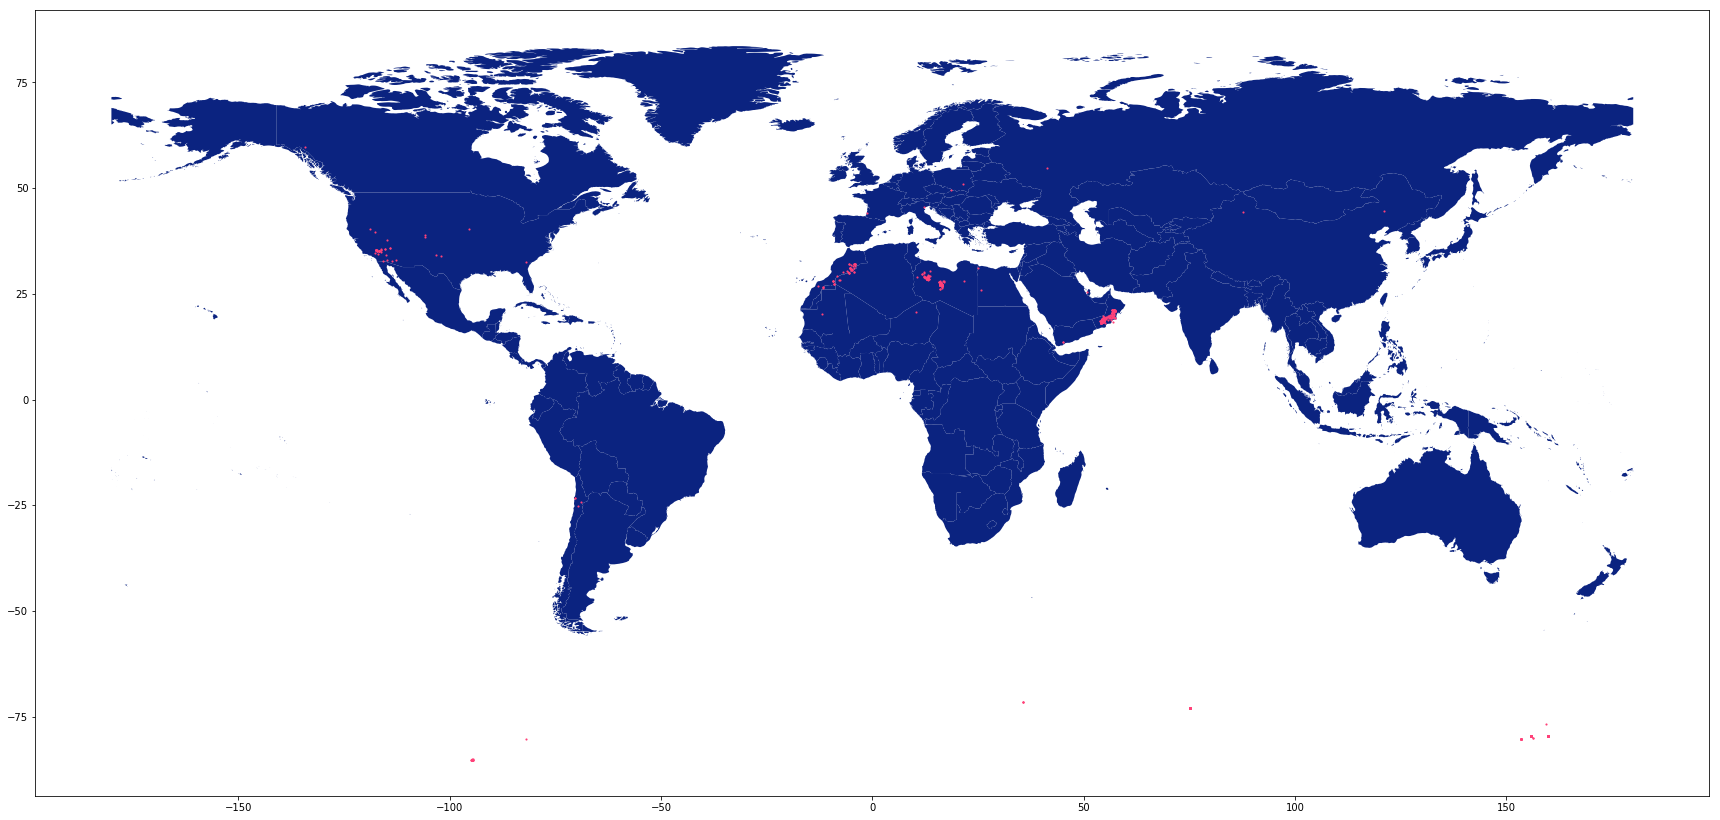

In [58]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380')
plot_year(geo_final, 2000, base_axis = base)

In [71]:
def plot_years(df, year, column_name_year = 'year', base_axis = base):
    """Given a base figure will plot one years worth of locations
    
        Keyword arguments:
        base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
        df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
        year -- enter a year as int
        column_name_year -- enter the column name of the year column
    
    """
    df_year = df[(df[column_name_year] <= year) & (df[column_name_year] > 0)]
    df_year.plot(ax=base_axis, marker=".", markersize=25,  color='#FF4179')

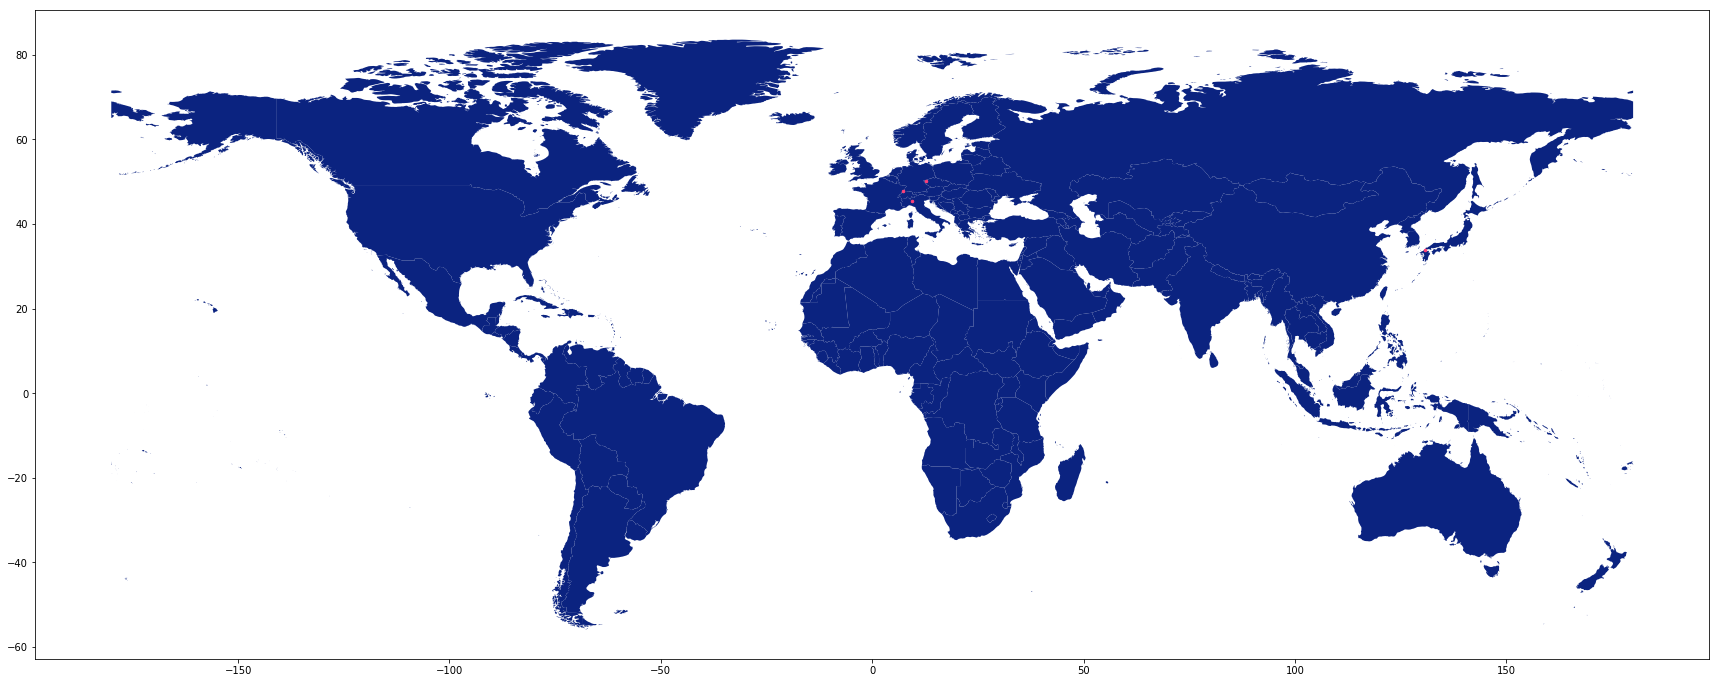

In [72]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380')
plot_years(geo_final, 1500, base_axis = base)